In [23]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 0.13.0 Requires-Python >=3.8; 0.13.0rc0 Requires-Python >=3.8; 0.13.1 Requires-Python >=3.8; 0.13.2 Requires-Python >=3.8
ERROR: Could not find a version that satisfies the requirement seaborn==0.13.2 (from versions: 0.1, 0.2.0, 0.2.1, 0.3, 0.3.1, 0.4.0, 0.5.0, 0.5.1, 0.6.0, 0.7.0, 0.7.1, 0.8, 0.8.1, 0.9.0, 0.9.1rc0, 0.9.1, 0.10.0rc0, 0.10.0, 0.10.1, 0.11.0rc0, 0.11.0, 0.11.1, 0.11.2rc0, 0.11.2, 0.12.0b0, 0.12.0b1, 0.12.0b2, 0.12.0b3, 0.12.0rc0, 0.12.0, 0.12.1, 0.12.2)
ERROR: No matching distribution found for seaborn==0.13.2


In [24]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [25]:
# Mengimpor dataset
dataset = pd.read_csv('Data/Marketing_Data.csv')
dataset.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


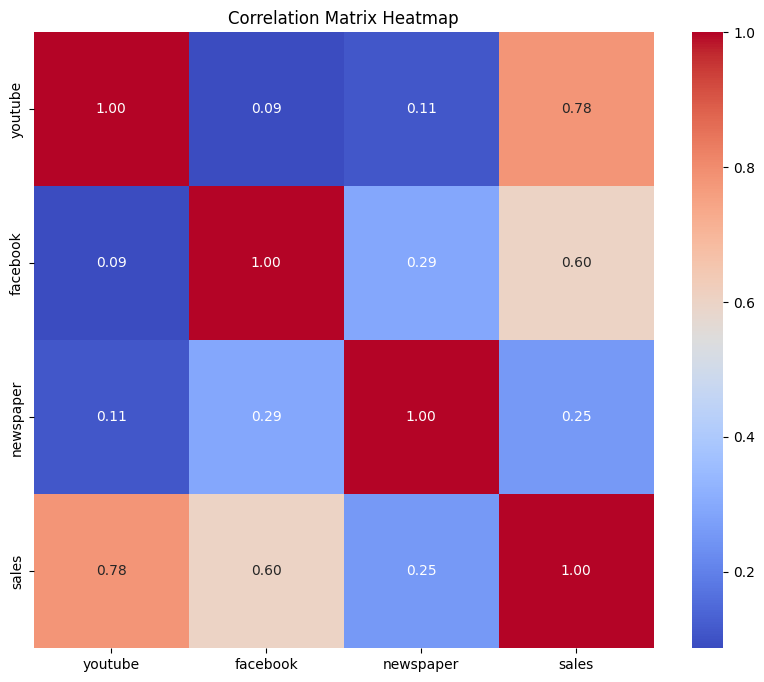

In [27]:
from matplotlib import pyplot as plt
# Exclude non-numeric columns from the correlation matrix
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = dataset[numeric_cols].corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [28]:
# Split data menjadi features (X) dan target variable (y)
X = dataset.iloc[:, [0]].values
y = dataset.iloc[:, 3].values 

In [29]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Mesinreg = Sequential()


Mesinreg.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))


Mesinreg.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))


Mesinreg.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))


Mesinreg.compile(optimizer='adam', loss='mean_squared_error')


Mesinreg.fit(X_train, y_train, batch_size=10, epochs=100)


y_pred = Mesinreg.predict(X_test)

Epoch 1/100
14/14 [==============================] - 0s 822us/step - loss: 321.3758
Epoch 2/100
14/14 [==============================] - 0s 554us/step - loss: 320.8422
Epoch 3/100
14/14 [==============================] - 0s 754us/step - loss: 320.2465
Epoch 4/100
14/14 [==============================] - 0s 731us/step - loss: 319.5696
Epoch 5/100
14/14 [==============================] - 0s 576us/step - loss: 318.7921
Epoch 6/100
14/14 [==============================] - 0s 667us/step - loss: 317.8606
Epoch 7/100
14/14 [==============================] - 0s 500us/step - loss: 316.7539
Epoch 8/100
14/14 [==============================] - 0s 730us/step - loss: 315.4169
Epoch 9/100
14/14 [==============================] - 0s 693us/step - loss: 313.8393
Epoch 10/100
14/14 [==============================] - 0s 577us/step - loss: 311.9350
Epoch 11/100
14/14 [==============================] - 0s 808us/step - loss: 309.6611
Epoch 12/100
14/14 [==============================] - 0s 654us/step - loss

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse_modified = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae_modified = mean_absolute_error(y_test, y_pred)

# Calculate R^2
r_squared = r2_score(y_test, y_pred)

# Print modified metrics
print("Root Mean Square Error (RMSE):", rmse_modified)
print("Mean Absolute Error (MAE):", mae_modified)
print("R-squared (R^2):", r_squared)

Root Mean Square Error (RMSE): 3.8493374993168183
Mean Absolute Error (MAE): 3.030516702924456
R-squared (R^2): 0.6622002386519863


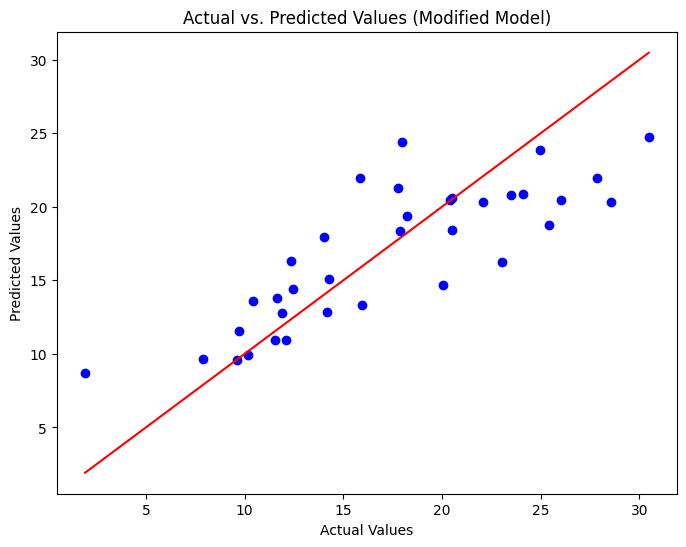

In [33]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.title('Actual vs. Predicted Values (Modified Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()